In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [3]:
file_list = glob("./data/*.csv")
file_list

['./data\\conversionRates.csv',
 './data\\freeformResponses.csv',
 './data\\multipleChoiceResponses.csv',
 './data\\schema.csv']

In [4]:
# Multi choice question(mcq)
mcq = pd.read_csv(file_list[3])
mcq.shape

(290, 3)

In [5]:

# Multi choise answer(mca)
mca = pd.read_csv(file_list[2], encoding="cp437", low_memory=False)
mca.shape

(16716, 228)

In [6]:
mcq.columns

Index(['Column', 'Question', 'Asked'], dtype='object')

In [7]:
job_df = mcq[mcq["Column"].str.contains("JobFactor", regex=True)]
job_df.shape

(16, 3)

In [8]:
job_df.head()

,Column,Question,Asked
274,JobFactorLearning,How are you assessing potential job opportunit...,Learners
275,JobFactorSalary,How are you assessing potential job opportunit...,Learners
276,JobFactorOffice,How are you assessing potential job opportunit...,Learners
277,JobFactorLanguages,How are you assessing potential job opportunit...,Learners
278,JobFactorCommute,How are you assessing potential job opportunit...,Learners


In [9]:
job_df.iloc[:, 1].values

array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

In [10]:
job_list = mca.columns[mca.columns.str.contains("JobFactor", regex=True)].tolist()
job_list[:5]

['JobFactorLearning',
 'JobFactorSalary',
 'JobFactorOffice',
 'JobFactorLanguages',
 'JobFactorCommute']

In [11]:
mca[job_list[0]].value_counts()

Very Important        2568
Somewhat important     896
Not important           87
Name: JobFactorLearning, dtype: int64

In [ ]:
job_dict = {}
for job in job_list:
    temp = mca[job].value_counts(normalize=True)
    job_dict[job[len("JobFactor"):]] = temp
job_dict

In [31]:
job_df = pd.DataFrame(job_dict).transpose()
job_df.columns

Index(['Not important', 'Somewhat important', 'Very Important'], dtype='object')

In [40]:
job_df.sort_index(ascending=False, axis=1, inplace=True)
job_df.sort_values("Very Important", ascending=False, inplace=True)
job_df


,Very Important,Somewhat important,Not important
Learning,0.723177,0.252323,0.024500
Office,0.533449,0.405998,0.060554
Languages,0.485468,0.443165,0.071367
Salary,0.461119,0.488953,0.049928
Management,0.443506,0.466511,0.089983
ExperienceLevel,0.412860,0.494908,0.092232
Title,0.405390,0.444640,0.149971
Impact,0.393341,0.490866,0.115793
PublishingOpportunity,0.355724,0.438960,0.205315
Department,0.352166,0.482728,0.165105


<Axes: >

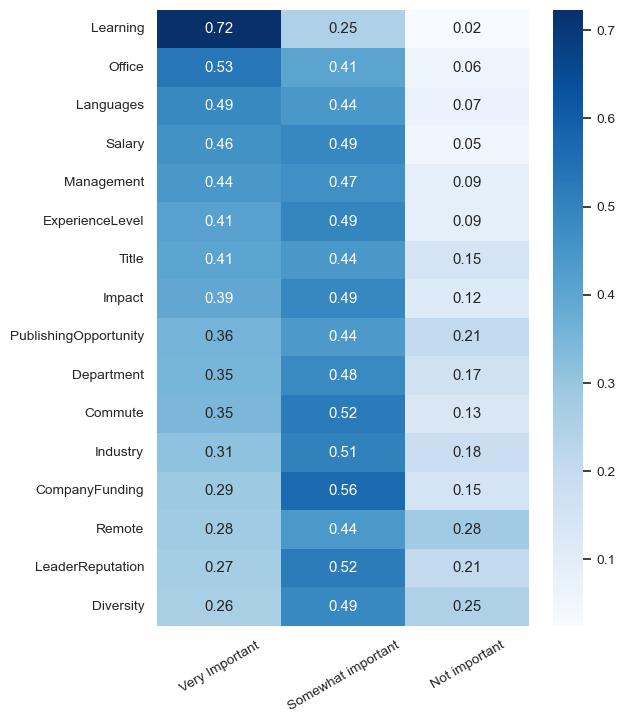

In [42]:
plt.figure(figsize=(6, 8))
plt.xticks(rotation=30)
sns.set(font_scale=0.9)
sns.heatmap(job_df,
            annot=True,
            fmt=".2f",
            cmap="Blues")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Learning'),
  Text(1, 0, 'Office'),
  Text(2, 0, 'Languages'),
  Text(3, 0, 'Salary'),
  Text(4, 0, 'Management'),
  Text(5, 0, 'ExperienceLevel'),
  Text(6, 0, 'Title'),
  Text(7, 0, 'Impact'),
  Text(8, 0, 'PublishingOpportunity'),
  Text(9, 0, 'Department'),
  Text(10, 0, 'Commute'),
  Text(11, 0, 'Industry'),
  Text(12, 0, 'CompanyFunding'),
  Text(13, 0, 'Remote'),
  Text(14, 0, 'LeaderReputation'),
  Text(15, 0, 'Diversity')])

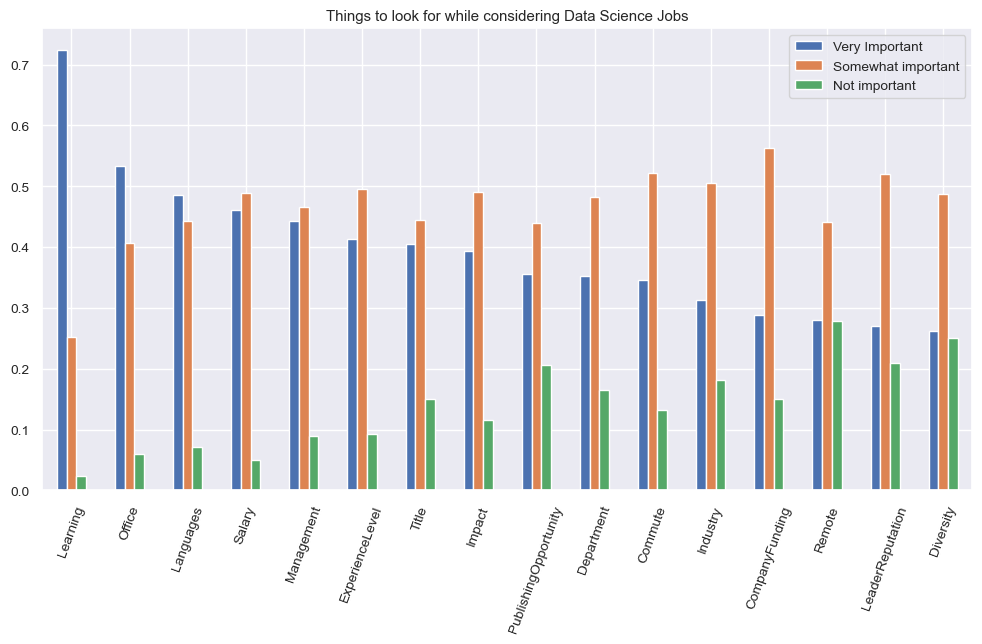

In [50]:
job_df.plot.bar(figsize=(12, 6),
                title="Things to look for while considering Data Science Jobs")
plt.xticks(rotation=70)